---
# Capstone Sprint 3

---

# "@!#$!#"

#### (garbled expletive)


##### OR

# DEEP Q*BERT

---

**Patrick Nemeth**

**Brainstation Data Science Bootcamp**

**May 2024**

---
# Introduction

In this notebook, I aim to teach an agent to play the classic Atari game Q*bert using reinforcement learning. Specifically, I will explore the Q-learning algorithm and DQN models to learn an optimal policy for navigating the game's environment in order to maximize the AI agent's reward.

Q*bert is a challenging and chaotic game that requires strategic decision-making and rapid adaptation to a fast-paced and dynamic environment.

I first chose the Q-learning algorithm because it is a model-free reinforcement learning method that can learn optimal strategies from accumulated experience and without requiring any prior knowledge of the game's mechanics.

The significance of this project lies in the broader use of RL techniques to solve complex decision-making problems in real-world appplications such as smart navigation systems or robotics. By successfully training an agent to play Q*bert, I aim to demonstrate the potential of reinforcement learning to learn intricate strategy and adapt to dynamic environments.

# Initial Setup

## Install Necessary Libraries





In [3]:
# Install libraries
!pip install gymnasium[atari] # install the gymnasium library with necessary atari 2600 dependencies
!pip install gymnasium[accept-rom-license] # install Atari 2600 ROMs
!pip install tianshou # install the tianshou library for reinforcement learning automation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 11.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=7626f86a384e1d7121ff348dcc4c88622b72fc80c7604fda5efd2362c149661d
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.8/847.8 kB 49.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_c

After the installations, the next step is to import these libraries into our notebook:

In [4]:
import sys # to verify python version
import matplotlib.pyplot as plt # for visualizing the Q*Bert environment
import numpy as np # for numerical operations
import imageio # for reading and writing video of the Q*Bert environment
import base64 # for encoding and decoding video into the colab notebook
from IPython.display import HTML # for displaying the video in the colab notebook
from skimage.color import rgb2gray # for preprocessing the Q*Bert environment
from skimage.transform import resize # for preprocessing the Q*Bert environment
import pickle # for saving the results of the Q-Learning algorithm
import tianshou # for reinforcement learning automation
import tianshou as ts
from tianshou.utils.net.common import Net # for creating the neural network for the Q-Learning algorithm
import gymnasium as gym # for creating the Q*Bert environment
import torch
from torch.utils.tensorboard import SummaryWriter # for visualizing the training process of the Q-Learning algorithm
from torch import nn

In [5]:
#Verify Python version for compatibility with installed libraries
print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


# The Gymnasium Library

Gymnasium provides an API that simplifies the creation and interaction with a wide range of Reinforcement Learning (RL)L environments including classic Atari 2600 games, which have become benchmarks in reinforcement learning research due to their dynamic complexity and challenge.

### Core Concepts

- **Environment**: The setting in which our agent operates. For Atari games, this includes the game setting and mechanics.
- **Action Space**: Defines the set of possible actions that our agent can take in it's environment, mirroring the inputs of classic video game controllers.
- **Observation Space**: Describes what our agent perceives from it's environment, including game screens or game state information.
- **Reward Space**: Determines how our agent is rewarded based on it's actions inside the game environment, guiding it's learning process.

## Atari Environments

The Atari 2600, released in 1977, was one of the first videogame systems to use swappable game cartridges, and contains a vast library of games. This makes the Atari 2600 environment a foundational resource for reinforcement learning research, providing an array of environments for researchers to test.  

### Setting Up an Atari Environment in Gymnasium

Let's start by setting up an Atari 2600 game environment inside Python to better understand its configurations and how to interact with it.

In [5]:
# List all available Atari environments in the Gymnasium library
envs = gym.envs.registry.keys()
print(sorted(envs))


['ALE/Adventure-ram-v5', 'ALE/Adventure-v5', 'ALE/AirRaid-ram-v5', 'ALE/AirRaid-v5', 'ALE/Alien-ram-v5', 'ALE/Alien-v5', 'ALE/Amidar-ram-v5', 'ALE/Amidar-v5', 'ALE/Assault-ram-v5', 'ALE/Assault-v5', 'ALE/Asterix-ram-v5', 'ALE/Asterix-v5', 'ALE/Asteroids-ram-v5', 'ALE/Asteroids-v5', 'ALE/Atlantis-ram-v5', 'ALE/Atlantis-v5', 'ALE/Atlantis2-ram-v5', 'ALE/Atlantis2-v5', 'ALE/Backgammon-ram-v5', 'ALE/Backgammon-v5', 'ALE/BankHeist-ram-v5', 'ALE/BankHeist-v5', 'ALE/BasicMath-ram-v5', 'ALE/BasicMath-v5', 'ALE/BattleZone-ram-v5', 'ALE/BattleZone-v5', 'ALE/BeamRider-ram-v5', 'ALE/BeamRider-v5', 'ALE/Berzerk-ram-v5', 'ALE/Berzerk-v5', 'ALE/Blackjack-ram-v5', 'ALE/Blackjack-v5', 'ALE/Bowling-ram-v5', 'ALE/Bowling-v5', 'ALE/Boxing-ram-v5', 'ALE/Boxing-v5', 'ALE/Breakout-ram-v5', 'ALE/Breakout-v5', 'ALE/Carnival-ram-v5', 'ALE/Carnival-v5', 'ALE/Casino-ram-v5', 'ALE/Casino-v5', 'ALE/Centipede-ram-v5', 'ALE/Centipede-v5', 'ALE/ChopperCommand-ram-v5', 'ALE/ChopperCommand-v5', 'ALE/CrazyClimber-ram-v5'

# Initialize the Q*bert environment with RGB rendering to see the game screen

In [8]:
#  Initialize the Q*bert environment with RGB rendering to see the game screen
env = gym.make('ALE/Qbert-v5', render_mode='rgb_array')

In [9]:
# Reset the environment to get the initial state and environment information
initial_state_array, initial_state_info = env.reset()

In [13]:
# Print out the initial state information
print("Initial Observation Shape:", initial_state_array.shape) # the dimensions of the game screen
print("Data Type of initial state array:", initial_state_array.dtype) # the data type of the game screen
print("Initial Game Info:", initial_state_info) # the information dictionary of the game

initial_state_array, initial_state_info = env.reset() # reset the environment and get the initial state
print("Initial state array representation of the Q*Bert environment:", initial_state_array) # the initial state array


Initial Observation Shape: (210, 160, 3)
Data Type of initial state array: uint8
Initial Game Info: {'lives': 4, 'episode_frame_number': 0, 'frame_number': 0}
Initial state array representation of the Q*Bert environment: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


These outputs provide a snapshot of the beginning of the game

- **Initial Observation Shape**: The resolution of the game screen, which is 210x160 pixels with 3 channels (RGB).
- **Data Type of Initial State Array**: Each pixel's colour intensity is stored as an integer, which allows for 256 possible values per RGB channel.
- **Initial Game Info**: Provides game-specific information such as the number of lives remaining and frame number of the observation.

### Initialize Environment and Display Initial State

Here I will initialize the Q*bert environment with an RGB rendering to visualize the initial state of the game:


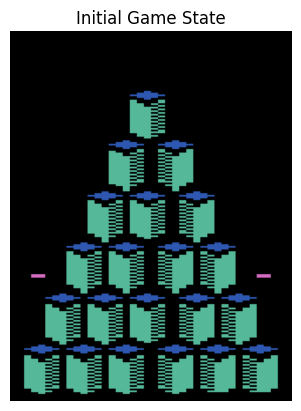

In [18]:
# Initialize the Q*bert environment with RGB rendering
env = gym.make("ALE/Qbert-v5", render_mode='rgb_array')
observation, info = env.reset()

# Display the initial game state
plt.imshow(observation)
plt.title("Initial Game State")
plt.axis('off')
plt.show()

### Frame-by-Frame Analysis

To determine when Qbert appears in the game, I will perform a frame-by-frame analysis of each successive frame until our Q*Bert appears at the top of the pyramid:


In [19]:
# Reset the environment to the initial state
initial_state, _ = env.reset()

# Define the number of frames to inspect
num_frames_to_inspect = 40

# Display the initial state
plt.figure(figsize=(10, 8))
plt.imshow(initial_state)
plt.title("Initial State of Q*bert")
plt.axis('off')
plt.show()

# Step through each frame and display it
for i in range(num_frames_to_inspect):
    observation, _, _, _, _ = env.step(0)  # NOOP to advance frames without taking action
    plt.figure(figsize=(10, 8))
    plt.imshow(observation)
    plt.title(f"Frame {i + 1}")  # Frame counting from 1 after initial state
    plt.axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

## Discovery of Q*Bert's Appearance

These frames reveal that QBert does not appear at the very start of the game, but becomes visible from frame 38 onwards.  We can skip these inital frames where Q*Bert is not present.  

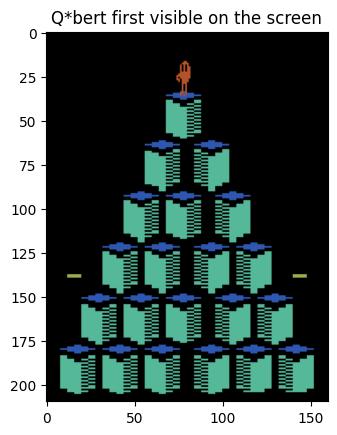

In [21]:
# Define the number of frames to skip
frames_to_skip = 38

# Reset the environment
observation, info = env.reset()

# Skip the initial frames where Q*bert is not present
for _ in range(frames_to_skip):
    observation, _, _, _, _ = env.step(0)

# Display the frame where Q*bert should be visible
plt.imshow(observation)
plt.title("Q*bert first visible on the screen")
plt.show()

### Exploring Q*Bert's Action Space

In this section I will examine each action available to our agent inside the Q*Bert environment, but first I will outline how to capture, encode, and display videos of these actions inside a Google Colab notebook.

### Embedding Videos in Jupyter Notebook

To embed an MP4 video in the notebook, I'll use the IPython display module:




In [22]:
# Function to embed an MP4 file in the notebook
def embed_mp4(filename):
    video = open(filename, 'rb').read() # Read the video file
    b64 = base64.b64encode(video) # Encode the video file to base64
    tag = f'''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{b64.decode()}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''
    return HTML(tag) # Return the HTML tag to display the video

### Capturing and Saving Video of Q*Bert's Actions

Each action performed by Q*Bert is captured and saved as video (MP4 format) in order to see how each specific action affects the game environment:

In [23]:
# Create a video of the Q*Bert environment
def create_action_video(env, filename, action, frames_to_capture=50):
    frames = [] # Initialize an empty list to store frames
    env.reset() # Reset the environment to start a new episode
    for _ in range(frames_to_capture): # Iterate over the number of frames to capture
        observation, _, _, _, _ = env.step(action) # Take the specified action
        frames.append(observation) # Append the observation to the frames list

    # Save frames as a video using imageio with FFMPEG
    with imageio.get_writer(filename, fps=30, format='FFMPEG') as video:
        for frame in frames:
            video.append_data(frame)

    return filename

In [26]:
# Example usage: Create and save a video for the 'UP' action
video_filename = create_action_video(env, 'qbert_up_action.mp4', action=2)

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


### Displaying the Action Video in the Notebook

After generating the video for specific actions, I'll use the above `embed_mp4` function to display the video within the notebook:


In [28]:
# Embed the video in the notebook
embed_mp4(video_filename)

In [30]:
# Get the number of actions in the Q*Bert environment
num_actions = env.action_space.n
print("Number of Actions:", num_actions)

Number of Actions: 6


Q*bert has an action space of (6) which translate to the following actions:

| Value | Meaning | Description                                                                 |
|-------|---------|-----------------------------------------------------------------------------|
| 0     | NOOP    | No operation. The agent does nothing.                           |
| 1     | FIRE    | Jump in place.
| 2     | UP      | Move diagonally up and left to the next platform. |
| 3     | RIGHT   | Move right, moving Q*bert diagonally up and right on the pyramid.           |
| 4     | LEFT    | Move left, moving Q*bert diagonally down and left on the pyramid.           |
| 5     | DOWN    | Move down, moving Q*bert diagonally down and right on the pyramid.          |

These actions allow Q*bert to navigate the environment by jumping between cubes while avoiding enemies.

# Capturing and Visualizing Actions in Q*Bert
To understand the effects of various actions in the Q*Bert environment, I will define a function to execute a given action within the game environment and record the outcome over several frames:

In [29]:
def perform_action(env, action, frames_count=60, action_label='', skip_initial=30):
    observations = []
    env.reset()

    # Skip initial frames
    for _ in range(skip_initial):
        env.step(0)  # Perform NOOP to advance frames without taking any actions

    # Perform the specified action and record subsequent frames
    for _ in range(frames_count):
        observation, _, done, _, _ = env.step(action)
        if done:
            break
        observations.append(observation)

    # Save the frames as a video
    filename = f'{action_label.lower().replace(" ", "_")}_action.mp4'
    with imageio.get_writer(filename, fps=30) as video:
        for frame in observations:
            video.append_data(frame)

    # Embed video in the notebook for an interactive display
    video_data = open(filename, 'rb').read()
    b64 = base64.b64encode(video_data).decode()
    display(HTML(f'''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{b64}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''))


### 1. NOOP (Action 0)
This action represents "no operation.", which can be used to observe the game state without taking any actions.

In [43]:
perform_action(env=env, action=0, action_label='NOOP', frames_count=60, skip_initial=30)


### 2. FIRE (Action 1)
In Q*Bert, the FIRE action appears to have the same effect as NOOP:

In [37]:
perform_action(env=env, action=1, action_label='FIRE', frames_count=60, skip_initial=30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


### 3. UP (Action 2)
This action moves Q*Bert diagonally up and to the right:


In [44]:
perform_action(env=env, action=2, action_label='UP', frames_count=60, skip_initial=30)

### 4. RIGHT (Action 3)
This action moves Q*Bert diagonally down and to the right:


In [40]:
perform_action(env=env, action=3, action_label='RIGHT', frames_count=60, skip_initial=30)

### 5. LEFT (Action 4)
This action moves Q*Bert diagonally up and to the left:


In [41]:
perform_action(env=env, action=4, action_label='LEFT', frames_count=60, skip_initial=30)

### 6. DOWN (Action 5)
This action moves Q*Bert diagonally down and to the left:


In [42]:
perform_action(env=env, action=5, action_label='DOWN', frames_count=60, skip_initial=30)


### Running a Random Policy in Q*Bert

 This section details a function that executes a random policy in the Q*Bert environment, capturing its performance in order to illustrate nature of random decisions and their impact on the game:


In [49]:
def run_random_policy_and_capture_video(env, episodes=1):
    for episode in range(episodes):
        observation, info = env.reset()
        done = False
        images = []  # to store frames for video
        reward_sum = 0

        while not done:
            action = env.action_space.sample()  # Select a random action
            observation, reward, done, trunc, info = env.step(action)
            images.append(observation)  # Append frame to video list
            reward_sum += reward

        # Save video
        video_filename = f'random_policy.mp4'
        imageio.mimsave(video_filename, images, fps=30)
        video = open(video_filename, 'rb').read()
        b64 = base64.b64encode(video)
        video_html = HTML(f'''
        <video width="640" height="480" controls>
          <source src="data:video/mp4;base64,{b64.decode()}" type="video/mp4">
        Your browser does not support the video tag.
        </video>''')
        display(video_html)

# Run the random policy and capture the video
run_random_policy_and_capture_video(env, episodes=1)

# Q-learning
Q-learning is a model-free reinforcement learning algorithm that attempts to learn the best policy for an agent interacting with an environment. The algorithm seeks to estimate the expected discounted reward, known as the Q-value, for each state-action pair.

These Q-values are updated based on the agent's experience, using what's called "The Bellman Equation".  I'm not going to be able to fully explaion this here, but it looks like this:

Q(s, a) ← Q(s, a) + α [r + γ max_a' Q(s', a') - Q(s, a)]

- s is the current state
- a is the action taken in state s
- s' is the next state after taking action a
- r is the reward received after taking action a
- α is the learning rate, which determines the amount of new information allowed to override old information
- γ is the discount factor, which determines the importance of future rewards

The goal of Q-learning is to learn an optimal policy π* that maximizes the expected accumulated discounted reward by selecting actions that maximize the Q-value in each state.


# Preprocessing Steps for Q-Learning
Before training our Q-learning model with game frames from Q*Bert, I'll need to preprocess the observation data to reduce dimensionality and complexity:

### Step 1: Grayscale Conversion
Converting color frames from RGB to grayscale will simplify the input by collapsing the three RGB color channels into one.

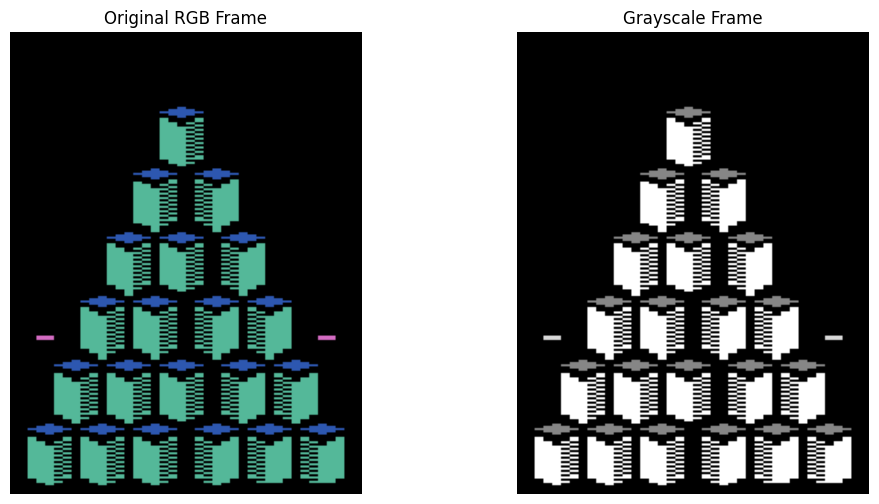

In [51]:
# Convert RGB image to grayscale
def convert_to_grayscale(frame): # Convert RGB image to grayscale
    return rgb2gray(frame)

# Apply grayscale conversion to the initial frame
grayscale_frame = convert_to_grayscale(initial_state_array)

# Displaying the original and grayscale images for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(initial_state_array)
plt.title('Original RGB Frame')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayscale_frame, cmap='gray')
plt.title('Grayscale Frame')
plt.axis('off')
plt.show()

### Step 2: Downsampling
Reducing the resolution of the image through downsampling to a standard dimension like 84x84 pixels to strike a balance between image detail and processing speed.

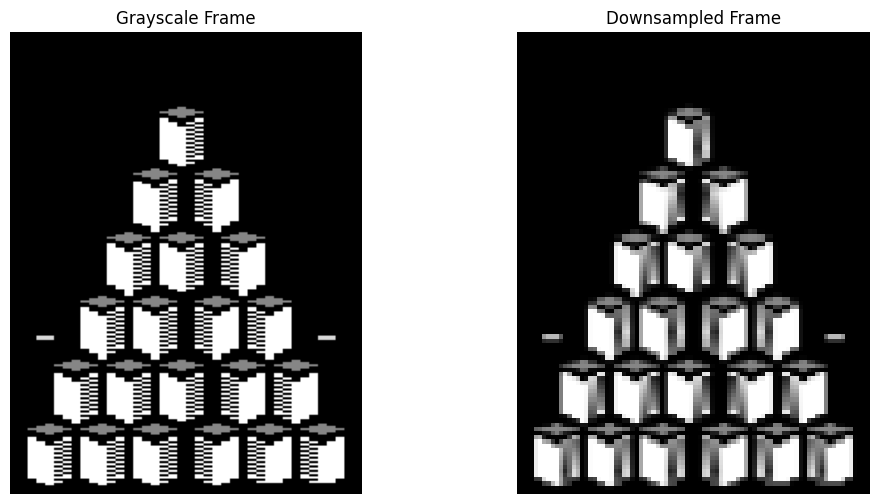

In [52]:
# Resize the input frame to the specified dimensions
def downsample(frame, new_size=(110, 84)):
    return resize(frame, new_size, anti_aliasing=True)

# Apply downsampling to the grayscale frame
downsampled_frame = downsample(grayscale_frame)

# Displaying the grayscale and downsampled images for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(grayscale_frame, cmap='gray')
plt.title('Grayscale Frame')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(downsampled_frame, cmap='gray')
plt.title('Downsampled Frame')
plt.axis('off')
plt.show()

### Step 3: Normalization
This standard step in image processing scales pixel values to a range that is more suitable for neural network inputs. Normalization adjusts the scale of the pixel values and will not affect the visual appearance of the image.

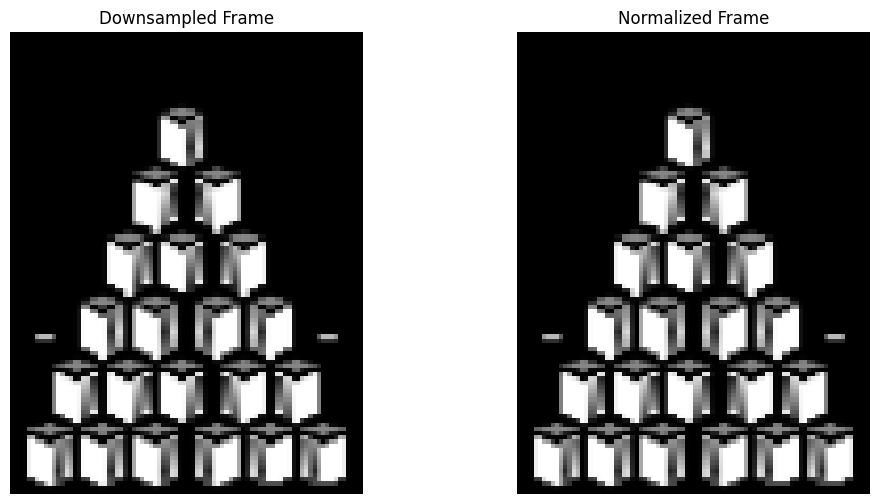

In [53]:
# Normalizes the pixel value in the frame to the range [0, 1]
def normalize(frame):
    return frame / 255.0

# Apply normalization to the downsampled frame
normalized_frame = normalize(downsampled_frame)

# Displaying the downsampled and normalized images for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(downsampled_frame, cmap='gray')
plt.title('Downsampled Frame')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_frame, cmap='gray')
plt.title('Normalized Frame')
plt.axis('off')
plt.show()

### Integrated Preprocessing Function

This function integrates grayscale conversion, downsampling, and normalization into a single step:

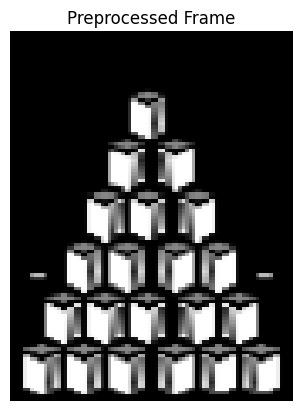

In [55]:
def preprocess_frame(frame):
    # Convert frame to grayscale
    gray_frame = rgb2gray(frame)

    # Downsample the grayscale frame to reduce resolution
    downsampled_frame = resize(gray_frame, (110, 84), anti_aliasing=True)

    # Normalize the downsampled frame to scale pixel values between 0 and 1
    normalized_frame = downsampled_frame / 255.0

    return normalized_frame

# Apply preprocessing to the initial frame
initial_frame = env.reset()[0]
processed_frame = preprocess_frame(initial_frame)

# Display the preprocessed frame
plt.imshow(processed_frame, cmap='gray')
plt.title('Preprocessed Frame')
plt.axis('off')
plt.show()

## Extending the Preprocessing Pipeline for Q-Learning
After normalizing the frames, I'll need to further process the data to suit the specific needs of our Q-learning algorithm. This will involve flattening the normalized frame to a one-dimensional array and then converting it into a discrete state index, which simplifies the representation even further.

### Step 4: Flatten the Frame
Flattening the frame transforms the two-dimensional image data into a one-dimensional array, which will simplify the inputs for our Q-learning model.

In [56]:
# Flatten the 2D frame into a 1D array
def flatten_frame(frame):
    return frame.flatten()


### Step 5: Convert to Discrete State Index
The flattened frame is then converted into a discrete state index using hashing:

In [57]:
# Convert the flattened frame to a discrete state index via hashing
def get_state_index(flattened_frame):
    state_index = hash(flattened_frame.tobytes()) % 10000
    return state_index

    state_index = hash(flattened_frame.tobytes()) % 10000
    return state_index


### Combined Preprocessing Function with Flattening and State Indexing
Integrating all preprocessing steps, including grayscale conversion, downsampling, normalization, flattening, and state indexing into a single function ensures that each frame is efficiently processed from raw input to a discrete state index.

In [59]:
# Converts a raw game frame to a discrete state index after preprocessing
def preprocess_frame_to_index(frame):
    # Apply grayscale, downsample, and normalize
    gray_frame = rgb2gray(frame)
    downsampled_frame = resize(gray_frame, (110, 84), anti_aliasing=True)
    normalized_frame = downsampled_frame / 255.0
    # Flatten the normalized frame
    flattened_frame = normalized_frame.flatten()
    # Convert to a discrete state index
    state_index = hash(flattened_frame.tobytes()) % 10000
    return state_index


# Q-Learning Algorithm Implementation

### Preprocess Frame Function

First, we'll preprocess the frames:

In [60]:
def preprocess_frame(frame):
    # Apply grayscale, downsample, and normalize
    gray_frame = rgb2gray(frame)
    downsampled_frame = resize(gray_frame, (110, 84), anti_aliasing=True)
    normalized_frame = downsampled_frame / 255.0
    # Flatten the normalized frame
    flattened_frame = normalized_frame.flatten()
    # Convert to a discrete state index
    state_index = hash(flattened_frame.tobytes()) % 10000
    return state_index

### "get_state" Function

This function processes the output from either the environment's reset or step method:

In [61]:
 def get_state(output):
    if isinstance(output, tuple): # Check that the output is a tuple
        frame = output[0]
        info = output[-1]
    else:
        frame = output
        info = {}
    return preprocess_frame(frame), info

### Q-Learning Hyperparameters

In [62]:
alpha = 0.1  # learning rate
gamma = 0.99  # discount factor
epsilon = 0.1  # exploration rate

### Initialize the Q-Table

The q_table is a fundamental component in Q-learning, representing the estimated rewards for each state-action pair:

In [63]:
num_states = 10000  # Hash table size to reduce the complexity of the state space
num_actions = env.action_space.n #  total number of possible actions derived from the environment's action space
q_table = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

# Begin baseline Q-Learning

Training Episodes:   0%|          | 1/2500 [00:00<22:35,  1.84episode/s]

Episode 0: Total reward = 50.0, Truncated: False, Moving Avg: 50.0


Training Episodes:   4%|▍         | 101/2500 [01:03<24:07,  1.66episode/s]

Episode 100: Total reward = 150.0, Truncated: False, Moving Avg: 143.0


Training Episodes:   8%|▊         | 201/2500 [02:04<21:36,  1.77episode/s]

Episode 200: Total reward = 50.0, Truncated: False, Moving Avg: 133.5


Training Episodes:  12%|█▏        | 301/2500 [03:06<23:41,  1.55episode/s]

Episode 300: Total reward = 75.0, Truncated: False, Moving Avg: 132.25


Training Episodes:  16%|█▌        | 401/2500 [04:22<25:43,  1.36episode/s]

Episode 400: Total reward = 250.0, Truncated: False, Moving Avg: 310.5


Training Episodes:  20%|██        | 501/2500 [05:40<22:47,  1.46episode/s]

Episode 500: Total reward = 25.0, Truncated: False, Moving Avg: 309.75


Training Episodes:  24%|██▍       | 601/2500 [06:58<26:42,  1.18episode/s]

Episode 600: Total reward = 575.0, Truncated: False, Moving Avg: 318.5


Training Episodes:  28%|██▊       | 701/2500 [08:16<23:43,  1.26episode/s]

Episode 700: Total reward = 225.0, Truncated: False, Moving Avg: 289.0


Training Episodes:  32%|███▏      | 801/2500 [09:34<21:43,  1.30episode/s]

Episode 800: Total reward = 575.0, Truncated: False, Moving Avg: 290.0


Training Episodes:  36%|███▌      | 901/2500 [10:50<21:14,  1.26episode/s]

Episode 900: Total reward = 375.0, Truncated: False, Moving Avg: 273.5


Training Episodes:  40%|████      | 1001/2500 [12:08<18:31,  1.35episode/s]

Episode 1000: Total reward = 250.0, Truncated: False, Moving Avg: 301.5


Training Episodes:  44%|████▍     | 1101/2500 [13:25<16:05,  1.45episode/s]

Episode 1100: Total reward = 75.0, Truncated: False, Moving Avg: 288.25


Training Episodes:  48%|████▊     | 1201/2500 [14:43<19:08,  1.13episode/s]

Episode 1200: Total reward = 600.0, Truncated: False, Moving Avg: 299.0


Training Episodes:  52%|█████▏    | 1301/2500 [16:00<15:22,  1.30episode/s]

Episode 1300: Total reward = 125.0, Truncated: False, Moving Avg: 265.25


Training Episodes:  56%|█████▌    | 1401/2500 [17:19<14:32,  1.26episode/s]

Episode 1400: Total reward = 50.0, Truncated: False, Moving Avg: 288.75


Training Episodes:  60%|██████    | 1501/2500 [18:37<12:27,  1.34episode/s]

Episode 1500: Total reward = 525.0, Truncated: False, Moving Avg: 301.5


Training Episodes:  64%|██████▍   | 1601/2500 [19:56<12:47,  1.17episode/s]

Episode 1600: Total reward = 300.0, Truncated: False, Moving Avg: 294.5


Training Episodes:  68%|██████▊   | 1701/2500 [21:15<10:58,  1.21episode/s]

Episode 1700: Total reward = 550.0, Truncated: False, Moving Avg: 286.5


Training Episodes:  72%|███████▏  | 1801/2500 [22:37<09:37,  1.21episode/s]

Episode 1800: Total reward = 350.0, Truncated: False, Moving Avg: 336.5


Training Episodes:  76%|███████▌  | 1901/2500 [23:56<07:51,  1.27episode/s]

Episode 1900: Total reward = 600.0, Truncated: False, Moving Avg: 304.5


Training Episodes:  80%|████████  | 2001/2500 [25:13<06:10,  1.35episode/s]

Episode 2000: Total reward = 475.0, Truncated: False, Moving Avg: 309.25


Training Episodes:  84%|████████▍ | 2101/2500 [26:32<05:48,  1.14episode/s]

Episode 2100: Total reward = 925.0, Truncated: False, Moving Avg: 320.75


Training Episodes:  88%|████████▊ | 2201/2500 [27:50<03:33,  1.40episode/s]

Episode 2200: Total reward = 275.0, Truncated: False, Moving Avg: 268.0


Training Episodes:  92%|█████████▏| 2301/2500 [29:07<02:40,  1.24episode/s]

Episode 2300: Total reward = 250.0, Truncated: False, Moving Avg: 272.75


Training Episodes:  96%|█████████▌| 2401/2500 [30:25<01:18,  1.26episode/s]

Episode 2400: Total reward = 575.0, Truncated: False, Moving Avg: 274.25


Training Episodes: 100%|██████████| 2500/2500 [31:43<00:00,  1.31episode/s]


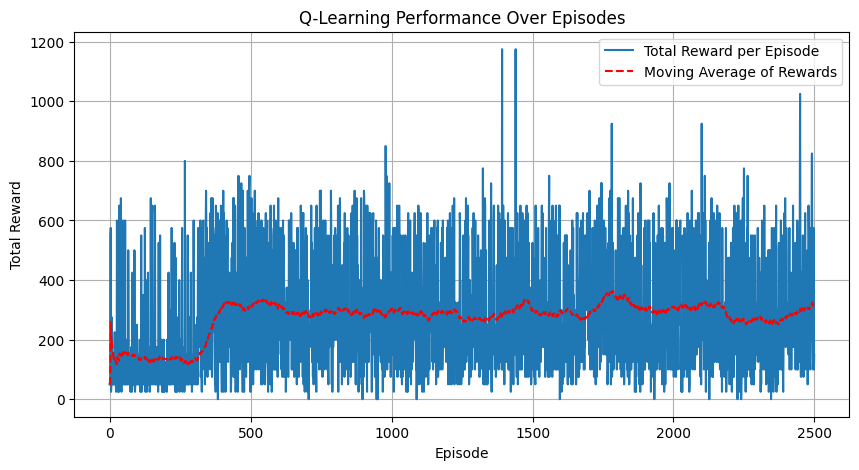

In [64]:
# Initialize the list to store rewards and a window for moving averages
rewards = []
moving_averages = []
window_size = 100  # Size of the moving average window

# Loop over a fixed number of episodes to train the agent
for episode in tqdm(range(2500), desc="Training Episodes", unit="episode"):
    full_observation = env.reset()
    current_state, _ = get_state(full_observation)
    done = False
    truncated = False
    total_reward = 0

# Continue the episode until the agent reaches a terminal state or the episode is truncated
    while not done and not truncated:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[current_state])  # Exploit

        full_output = env.step(action)
        next_observation, reward, done, truncated, info = full_output
        next_state, _ = get_state(next_observation)
        total_reward += reward

# Update the Q-table using the Bellman equation
        old_value = q_table[current_state, action]
        future_optimal_value = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * future_optimal_value)
        q_table[current_state, action] = new_value

        current_state = next_state # Move to the next state

    rewards.append(total_reward)  # Collect total reward for the episode

    # Calculate moving average of rewards
    if episode >= window_size:
        moving_avg = np.mean(rewards[-window_size:])
        moving_averages.append(moving_avg)
    else:
        moving_averages.append(np.mean(rewards))

    # Conditional alerts
    if episode % 100 == 0:
        print(f"Episode {episode}: Total reward = {total_reward}, Truncated: {truncated}, Moving Avg: {moving_averages[-1]}")

# Plotting the total rewards and moving averages
plt.figure(figsize=(10, 5))
plt.plot(rewards, label='Total Reward per Episode')
plt.plot(moving_averages, label='Moving Average of Rewards', color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Performance Over Episodes')
plt.legend()
plt.grid(True)
plt.show()

### Episode Results

- Episode Number: The training output logs every 100 episodes

- Total Reward: This is the accumulated reward obtained by the agent during that episode

- Truncated: This indicates whether the episode was truncated before reaching a terminal state. "Truncated: False" means the episode ran to completion without early termination

- Moving Avg: This represents the moving average of the rewards, calculated over a window of episodes in order to  to smooth out variations in rewards over episodes

### A note on Pickling:

"Pickling" is a process which allows these outputs to be stored on disk in order to save and later reload.


In [65]:
data_to_save = {
    'q_table': q_table,
    'rewards': rewards,
    'moving_averages': moving_averages
}

# Save to a file
with open('q_learning1.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

### Analysis:

The variability in reward outcomes as well as the fluctuations in the moving averages suggests that the agent's learning stability and optimization could still be enhanced.  Let's try adjusting the epsilon decay.

Training Episodes:   0%|          | 1/2500 [00:00<21:41,  1.92episode/s]

Episode 0: Total reward = 150.0, Moving Avg: 150.0


Training Episodes:   4%|▍         | 101/2500 [00:52<20:13,  1.98episode/s]

Episode 100: Total reward = 100.0, Moving Avg: 141.0


Training Episodes:   8%|▊         | 201/2500 [01:43<19:08,  2.00episode/s]

Episode 200: Total reward = 50.0, Moving Avg: 166.0


Training Episodes:  12%|█▏        | 301/2500 [02:33<17:16,  2.12episode/s]

Episode 300: Total reward = 50.0, Moving Avg: 128.5


Training Episodes:  16%|█▌        | 401/2500 [03:24<17:37,  1.98episode/s]

Episode 400: Total reward = 100.0, Moving Avg: 147.75


Training Episodes:  20%|██        | 501/2500 [04:14<18:19,  1.82episode/s]

Episode 500: Total reward = 75.0, Moving Avg: 145.25


Training Episodes:  24%|██▍       | 601/2500 [05:05<15:13,  2.08episode/s]

Episode 600: Total reward = 100.0, Moving Avg: 143.5


Training Episodes:  28%|██▊       | 701/2500 [05:54<17:32,  1.71episode/s]

Episode 700: Total reward = 525.0, Moving Avg: 150.0


Training Episodes:  32%|███▏      | 801/2500 [06:45<15:01,  1.88episode/s]

Episode 800: Total reward = 300.0, Moving Avg: 168.0


Training Episodes:  36%|███▌      | 901/2500 [07:34<14:36,  1.82episode/s]

Episode 900: Total reward = 150.0, Moving Avg: 147.5


Training Episodes:  40%|████      | 1001/2500 [08:24<11:37,  2.15episode/s]

Episode 1000: Total reward = 50.0, Moving Avg: 153.0


Training Episodes:  44%|████▍     | 1101/2500 [09:13<11:08,  2.09episode/s]

Episode 1100: Total reward = 50.0, Moving Avg: 132.25


Training Episodes:  48%|████▊     | 1201/2500 [10:04<10:27,  2.07episode/s]

Episode 1200: Total reward = 50.0, Moving Avg: 162.0


Training Episodes:  52%|█████▏    | 1301/2500 [10:53<09:49,  2.03episode/s]

Episode 1300: Total reward = 100.0, Moving Avg: 163.25


Training Episodes:  56%|█████▌    | 1401/2500 [11:43<09:31,  1.92episode/s]

Episode 1400: Total reward = 200.0, Moving Avg: 150.25


Training Episodes:  60%|██████    | 1501/2500 [12:31<07:45,  2.15episode/s]

Episode 1500: Total reward = 75.0, Moving Avg: 129.25


Training Episodes:  64%|██████▍   | 1601/2500 [13:20<07:30,  2.00episode/s]

Episode 1600: Total reward = 125.0, Moving Avg: 158.25


Training Episodes:  68%|██████▊   | 1701/2500 [14:11<06:56,  1.92episode/s]

Episode 1700: Total reward = 200.0, Moving Avg: 164.25


Training Episodes:  72%|███████▏  | 1801/2500 [15:00<05:41,  2.05episode/s]

Episode 1800: Total reward = 50.0, Moving Avg: 145.0


Training Episodes:  76%|███████▌  | 1901/2500 [15:50<04:53,  2.04episode/s]

Episode 1900: Total reward = 25.0, Moving Avg: 166.25


Training Episodes:  80%|████████  | 2001/2500 [16:39<04:07,  2.02episode/s]

Episode 2000: Total reward = 225.0, Moving Avg: 169.0


Training Episodes:  84%|████████▍ | 2101/2500 [17:28<03:03,  2.18episode/s]

Episode 2100: Total reward = 75.0, Moving Avg: 171.75


Training Episodes:  88%|████████▊ | 2201/2500 [18:17<02:41,  1.86episode/s]

Episode 2200: Total reward = 600.0, Moving Avg: 154.75


Training Episodes:  92%|█████████▏| 2301/2500 [19:06<01:32,  2.14episode/s]

Episode 2300: Total reward = 25.0, Moving Avg: 166.75


Training Episodes:  96%|█████████▌| 2401/2500 [19:53<00:44,  2.22episode/s]

Episode 2400: Total reward = 275.0, Moving Avg: 124.75


Training Episodes: 100%|██████████| 2500/2500 [20:42<00:00,  2.01episode/s]


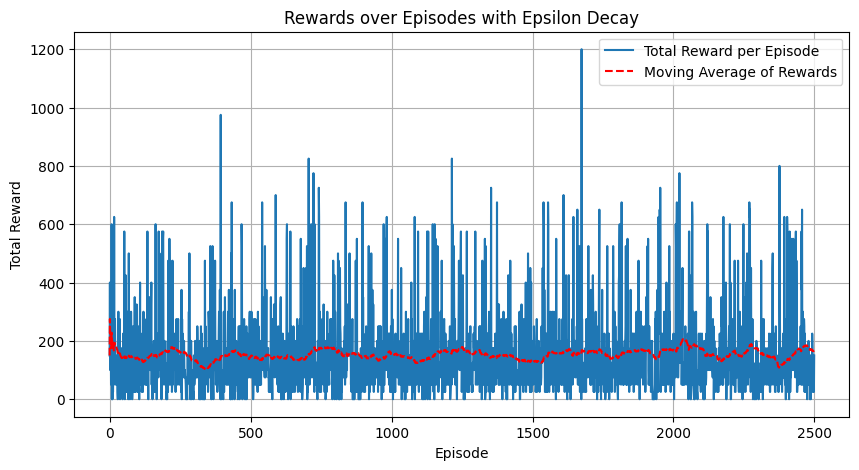

In [58]:
# Hyperparameters
epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 0.995
alpha = 0.9  # Constant learning rate
gamma = 0.99  # Discount factor
total_episodes = 2500

# Calculate epsilon for each episode
epsilon_values = epsilon_final + (epsilon_start - epsilon_final) * np.exp(-np.log((epsilon_start / epsilon_final)) / total_episodes * np.arange(total_episodes))

# Training loop with epsilon decay
rewards = []
moving_averages = []
window_size = 100  # Size of the moving average window

for episode in tqdm(range(total_episodes), desc="Training Episodes", unit="episode"):
    full_observation = env.reset()
    current_state, _ = get_state(full_observation)
    done = False
    truncated = False
    total_reward = 0
    epsilon = epsilon_values[episode]

    while not done and not truncated:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[current_state])  # Exploit

        next_observation, reward, done, truncated, info = env.step(action)
        next_state, _ = get_state(next_observation)
        total_reward += reward

        # Q-learning update
        old_value = q_table[current_state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[current_state, action] = new_value

        current_state = next_state

    rewards.append(total_reward)

    # Calculate moving average of rewards
    if episode >= window_size:
        moving_avg = np.mean(rewards[-window_size:])
        moving_averages.append(moving_avg)
    else:
        moving_averages.append(np.mean(rewards))

    # Conditional alerts
    if episode % 100 == 0:
        print(f"Episode {episode}: Total reward = {total_reward}, Moving Avg: {moving_averages[-1]}")

# Plotting the total rewards and moving averages
plt.figure(figsize=(10, 5))
plt.plot(rewards, label='Total Reward per Episode')
plt.plot(moving_averages, label='Moving Average of Rewards', color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes with Epsilon Decay')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
data_to_save = {
    'q_table': q_table,
    'rewards': rewards,
    'moving_averages': moving_averages
}

# Save to a file
with open('q_learning_epsilondecay1.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

Again, this seems inconclusive, as the algorithm may need to run many more times to see improvements.  As this is just a preliminary demonstration of Q-Learning, we'll try adjusting alpha in addition to epsillon before moving on to DQN.

Training Episodes:   0%|          | 1/2500 [00:00<17:01,  2.45episode/s]

Episode 0: Total reward = 650.0, Moving Avg: 650.0


Training Episodes:   4%|▍         | 101/2500 [00:29<10:59,  3.64episode/s]

Episode 100: Total reward = 175.0, Moving Avg: 168.75


Training Episodes:   8%|▊         | 201/2500 [00:58<11:11,  3.42episode/s]

Episode 200: Total reward = 200.0, Moving Avg: 153.75


Training Episodes:  12%|█▏        | 301/2500 [01:26<10:07,  3.62episode/s]

Episode 300: Total reward = 0.0, Moving Avg: 155.0


Training Episodes:  16%|█▌        | 401/2500 [01:57<11:22,  3.07episode/s]

Episode 400: Total reward = 250.0, Moving Avg: 187.75


Training Episodes:  20%|██        | 501/2500 [02:26<09:39,  3.45episode/s]

Episode 500: Total reward = 100.0, Moving Avg: 199.25


Training Episodes:  24%|██▍       | 601/2500 [02:57<08:48,  3.60episode/s]

Episode 600: Total reward = 50.0, Moving Avg: 223.5


Training Episodes:  28%|██▊       | 701/2500 [03:28<09:31,  3.15episode/s]

Episode 700: Total reward = 175.0, Moving Avg: 215.25


Training Episodes:  32%|███▏      | 801/2500 [03:58<09:09,  3.09episode/s]

Episode 800: Total reward = 250.0, Moving Avg: 218.0


Training Episodes:  36%|███▌      | 901/2500 [04:29<07:47,  3.42episode/s]

Episode 900: Total reward = 375.0, Moving Avg: 225.0


Training Episodes:  40%|████      | 1001/2500 [04:59<07:09,  3.49episode/s]

Episode 1000: Total reward = 425.0, Moving Avg: 200.25


Training Episodes:  44%|████▍     | 1101/2500 [05:27<07:03,  3.30episode/s]

Episode 1100: Total reward = 275.0, Moving Avg: 176.5


Training Episodes:  48%|████▊     | 1201/2500 [05:58<05:52,  3.69episode/s]

Episode 1200: Total reward = 100.0, Moving Avg: 246.25


Training Episodes:  52%|█████▏    | 1301/2500 [06:28<05:44,  3.48episode/s]

Episode 1300: Total reward = 150.0, Moving Avg: 237.5


Training Episodes:  56%|█████▌    | 1401/2500 [06:58<05:27,  3.36episode/s]

Episode 1400: Total reward = 75.0, Moving Avg: 228.5


Training Episodes:  60%|██████    | 1501/2500 [07:28<05:31,  3.01episode/s]

Episode 1500: Total reward = 150.0, Moving Avg: 212.25


Training Episodes:  64%|██████▍   | 1601/2500 [07:59<04:39,  3.22episode/s]

Episode 1600: Total reward = 200.0, Moving Avg: 247.0


Training Episodes:  68%|██████▊   | 1701/2500 [08:28<03:45,  3.55episode/s]

Episode 1700: Total reward = 125.0, Moving Avg: 192.75


Training Episodes:  72%|███████▏  | 1801/2500 [08:58<03:38,  3.19episode/s]

Episode 1800: Total reward = 150.0, Moving Avg: 175.25


Training Episodes:  76%|███████▌  | 1901/2500 [09:29<03:28,  2.87episode/s]

Episode 1900: Total reward = 300.0, Moving Avg: 238.5


Training Episodes:  80%|████████  | 2001/2500 [09:59<02:47,  2.97episode/s]

Episode 2000: Total reward = 75.0, Moving Avg: 190.25


Training Episodes:  84%|████████▍ | 2101/2500 [10:29<01:45,  3.78episode/s]

Episode 2100: Total reward = 75.0, Moving Avg: 203.25


Training Episodes:  88%|████████▊ | 2201/2500 [10:59<01:28,  3.40episode/s]

Episode 2200: Total reward = 50.0, Moving Avg: 199.25


Training Episodes:  92%|█████████▏| 2301/2500 [11:29<00:57,  3.49episode/s]

Episode 2300: Total reward = 50.0, Moving Avg: 197.0


Training Episodes:  96%|█████████▌| 2401/2500 [11:59<00:30,  3.28episode/s]

Episode 2400: Total reward = 125.0, Moving Avg: 198.5


Training Episodes: 100%|██████████| 2500/2500 [12:30<00:00,  3.33episode/s]


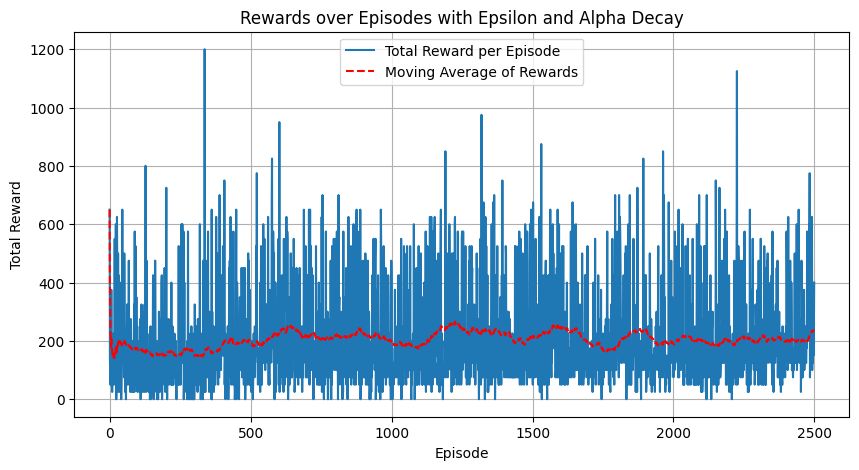

In [62]:
# Hyperparameters
epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 0.995
alpha_start = 0.9
alpha_final = 0.1
alpha_decay = 0.995
gamma = 0.99  # Discount factor
total_episodes = 2500

# Calculate epsilon and alpha for each episode
epsilon_values = epsilon_final + (epsilon_start - epsilon_final) * np.exp(-np.log((epsilon_start / epsilon_final)) / total_episodes * np.arange(total_episodes))
alpha_values = np.maximum(alpha_final, alpha_start * (alpha_decay ** np.arange(total_episodes)))

# Training loop with epsilon and alpha decay
rewards = []
moving_averages = []
window_size = 100  # Size of the moving average window

for episode in tqdm(range(total_episodes), desc="Training Episodes", unit="episode"):
    full_observation = env.reset()
    current_state, _ = get_state(full_observation)
    done = False
    truncated = False
    total_reward = 0
    epsilon = epsilon_values[episode]
    alpha = alpha_values[episode]

    while not done and not truncated:
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[current_state])  # Exploit

        # Correctly handling the step output
        next_observation, reward, done, truncated, info = env.step(action)  # Ensuring all returned values are captured

        next_state, _ = get_state(next_observation)
        total_reward += reward

        # Q-learning update
        old_value = q_table[current_state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[current_state, action] = new_value

        current_state = next_state

    rewards.append(total_reward)

    # Calculate moving average of rewards
    if episode >= window_size:
        moving_avg = np.mean(rewards[-window_size:])
        moving_averages.append(moving_avg)
    else:
        moving_averages.append(np.mean(rewards))

    # Conditional alerts

    if episode % 100 == 0:
        print(f"Episode {episode}: Total reward = {total_reward}, Moving Avg: {moving_averages[-1]}")

# Plotting the total rewards and moving averages
plt.figure(figsize=(10, 5))
plt.plot(rewards, label='Total Reward per Episode')
plt.plot(moving_averages, label='Moving Average of Rewards', color='red', linestyle='--')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes with Epsilon and Alpha Decay')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
data_to_save = {
    'q_table': q_table,
    'rewards': rewards,
    'moving_averages': moving_averages
}

# Save to a file
with open('q_learning_apha_epsilondecay1.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

We aren't seeing any remarkable results here, and due to time and compute shortages, we will now move on to DQN

# Introduction to DQN

DQN extends Q-learning by using a deep neural network to approximate the Q-function. The network takes the state of the environment as input and outputs Q-values for all possible actions. This approximation allows the DQN to handle complex and high-dimensional state spaces that Q-learning algorithms struggle with.

### Key Components of DQN

- Experience Replay: DQN utilizes a technique called experience replay to improve stability and efficiency. Actions taken by the agent are stored in a replay buffer, and the network is trained on a random sample from this buffer. This approach breaks the correlation between consecutive training samples and smooths out learning over previous experiences.

- Target Network: DQN uses a second, separate network called the target network to generate the Q-value targets for training the main network. This target network has the same architecture as the main network but its weights are updated less frequently. This reduces the variability of the target values and stabilizes training.

# DQN Implemetation

In this notebook I'll utilize the Tianshou reinforcement learning platform to handle the DQN

### Neural Network Architecture for Q*bert
We utilize a neural network to approximate the Q-values for state-action pairs:

In [66]:
class Net(nn.Module):
    def __init__(self, state_shape, action_shape):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(np.prod(state_shape), 128), nn.ReLU(inplace=True),
            nn.Linear(128, 128), nn.ReLU(inplace=True),
            nn.Linear(128, 128), nn.ReLU(inplace=True),
            nn.Linear(128, np.prod(action_shape)),
        )

    def forward(self, obs, state=None, info={}):
        if not isinstance(obs, torch.Tensor):
            obs = torch.tensor(obs, dtype=torch.float)
        batch = obs.shape[0]
        logits = self.model(obs.view(batch, -1))
        return logits, state

state_shape = env.observation_space.shape
action_shape = env.action_space.n  # This might be different for Q*bert
net = Net(state_shape, action_shape)
optim = torch.optim.Adam(net.parameters(), lr=1e-3)


# Define the neural network class
class Net(nn.Module):
    def __init__(self, state_shape, action_shape):
        super().__init__()  # Initialize the superclass
        # Create a sequential model
        self.model = nn.Sequential(
            # First layer takes the flattened state as input
            nn.Linear(np.prod(state_shape), 128), nn.ReLU(inplace=True),
            # Hidden layer with 128 units
            nn.Linear(128, 128), nn.ReLU(inplace=True),
            # Another hidden layer with 128 units
            nn.Linear(128, 128), nn.ReLU(inplace=True),
            # Output layer that produces a value for each possible action
            nn.Linear(128, np.prod(action_shape)),
        )

    # Define the forward pass
    def forward(self, obs, state=None, info={}):
        # Convert the observation to a torch Tensor
        if not isinstance(obs, torch.Tensor):
            obs = torch.tensor(obs, dtype=torch.float)
        # Determine the batch size (how many observations we're processing at once)
        batch = obs.shape[0]
        # Pass the flattened observations through the network
        logits = self.model(obs.view(batch, -1))
        # Return the logits and the state (state is unused here)
        return logits, state

# Get the shapes of the state and action spaces from the environment
state_shape = env.observation_space.shape
action_shape = env.action_space.n

# Initialize the network and an optimizer
net = Net(state_shape, action_shape)
optim = torch.optim.Adam(net.parameters(), lr=1e-3)


### Set up Vectorized Environment
Here we set up vectorized environments for both training and testing phases:

In [67]:
# Setup training environments
train_envs = ts.env.DummyVectorEnv([
    lambda: gym.make('ALE/Qbert-v5', render_mode='rgb_array')  # Create multiple instances of Q*bert
    for _ in range(10)  # Number of parallel environments
])

# Setup testing environments
test_envs = ts.env.DummyVectorEnv([
    lambda: gym.make('ALE/Qbert-v5', render_mode='rgb_array')  # Similar setup for testing
    for _ in range(100)
])

Here, we set up 10 environments in train_envs and 100 environments in test_envs.

### Setting up DQN policy

This involves integrating a previously defined neural network model and optimizer, specifying the game's action space, and tuning key hyperparameters that control the learning dynamics:

In [68]:
# Define the DQN policy using the network and optimizer we set up earlier
policy = ts.policy.DQNPolicy(
    model=net,  # Neural network defined previously
    optim=optim,  # Optimizer setup with the network
    action_space=env.action_space,  # Action space of the Q*bert game from the environment
    discount_factor=0.99,  # Discount factor for future rewards
    estimation_step=1,  # Number of steps to look ahead for estimating the Q-values
    target_update_freq=500  # Frequency of updating the target network
)


### Setup Collector
Here’s how we set up collectors in Tianshou for both training and testing phases in the Q*bert game environment

In [69]:
# Setup the training collector
train_collector = ts.data.Collector(
    policy,  # The DQN policy we defined earlier
    train_envs,  # The vectorized training environments
    ts.data.VectorReplayBuffer(10000, len(train_envs)),  # Replay buffer for storing experience
    exploration_noise=True  # Enable exploration noise for better exploration
)

# Setup the testing collector
test_collector = ts.data.Collector(
    policy,  # The same policy
    test_envs,  # The vectorized testing environments
    exploration_noise=True  # Exploration noise in testing
)

# Run the training process using an off-policy trainer
result = ts.trainer.OffpolicyTrainer(
    policy=policy,  # Policy to train
    train_collector=train_collector,  # Collector for training
    test_collector=test_collector,  # Collector for testing
    max_epoch=50,  # Total number of training epochs
    step_per_epoch=5000,  # Number of steps per epoch
    step_per_collect=10,  # Number of steps to perform before collecting new data
    episode_per_test=20,  # Number of episodes to run for each testing phase
    batch_size=64,  # Batch size for training
    train_fn=lambda epoch, env_step: policy.set_eps(0.1),  # Function to adjust policy during training
    test_fn=lambda epoch, env_step: policy.set_eps(0.05),  # Function to adjust policy during testing
    stop_fn=lambda mean_rewards: mean_rewards >= 200  # Stopping condition based on average rewards
).run()

# Output the result of training
print(f'Finished training! Use {result["duration"]}')


Epoch #1: 5001it [07:53, 10.55it/s, env_step=5000, len=356, loss=72.868, n/ep=0, n/st=10, rew=100.00]                          


Epoch #1: test_reward: 1.250000 ± 5.448624, best_reward: 481.250000 ± 102.125841 in #0
Finished training! Use 492.78s


Let's try again:

In [70]:
train_envs = ts.env.DummyVectorEnv([lambda: gym.make('ALE/Qbert-v5', render_mode='rgb_array') for _ in range(10)])
test_envs = ts.env.DummyVectorEnv([lambda: gym.make('ALE/Qbert-v5', render_mode='rgb_array') for _ in range(100)])

In [73]:
train_collector = ts.data.Collector(policy, train_envs, ts.data.VectorReplayBuffer(10000, 10), exploration_noise=True)
test_collector = ts.data.Collector(policy, test_envs, exploration_noise=True)

result = ts.trainer.OffpolicyTrainer(
    policy=policy,
    train_collector=train_collector,
    test_collector=test_collector,
    max_epoch=50,
    step_per_epoch=5000,
    step_per_collect=10,
    episode_per_test=10,
    batch_size=64,
    train_fn=lambda epoch, env_step: policy.set_eps(0.1),
    test_fn=lambda epoch, env_step: policy.set_eps(0.05),
    stop_fn=lambda mean_rewards: mean_rewards >= 200
).run()
print(f'Finished training! Use {result["duration"]}')

Epoch #1: 5001it [07:48, 10.67it/s, env_step=5000, len=284, loss=8.541, n/ep=0, n/st=10, rew=0.00]                          


Epoch #1: test_reward: 152.500000 ± 7.500000, best_reward: 152.500000 ± 7.500000 in #1


Epoch #2: 5001it [07:54, 10.53it/s, env_step=10000, len=390, loss=57.922, n/ep=0, n/st=10, rew=275.00]                          


Epoch #2: test_reward: 162.500000 ± 30.103986, best_reward: 162.500000 ± 30.103986 in #2


Epoch #3: 5001it [08:33,  9.74it/s, env_step=15000, len=402, loss=26.201, n/ep=0, n/st=10, rew=225.00]                          


Epoch #3: test_reward: 107.500000 ± 111.271065, best_reward: 162.500000 ± 30.103986 in #2


Epoch #4: 5001it [08:57,  9.30it/s, env_step=20000, len=304, loss=62.423, n/ep=0, n/st=10, rew=300.00]                          


Epoch #4: test_reward: 150.000000 ± 0.000000, best_reward: 162.500000 ± 30.103986 in #2


Epoch #5:  27%|##6       | 1340/5000 [02:34<07:02,  8.67it/s, env_step=21340, len=347, n/ep=1, n/st=10, rew=275.00]

Finished training! Use 2180.36s


# Key Observations from initial DQN

- Learning Stability: The fluctuating losses and test rewards indicate that while the agent is learning, the process is not entirely stable.
- Agent Improvement: Despite fluctuations, there is a general trend of increasing test rewards, suggesting incremental learning and adaptation by the agent.


# Future Work and Considerations:

- Further Training: Due to time and computation constraints, further training was halted. The progress I did make here suggests that additional epochs could continue to improve the agent’s performance.

- Hyperparameter Tuning: Adjusting learning rates, exploration rates (epsilon), and other parameters could potentially stabilize learning and improve both performance and convergence speed.

- Exploration vs. Exploitation: Implementing a more dynamic strategy for balancing exploration and exploitation might help in achieving more consistent performance across training and testing environments.

- I'd also like to explore in-depth statistical analysis focusing on:

 Performance Over Time, applying regression models to the reward and loss data across epochs to identify trends and changes in the agent’s learning curve

 Statistical analysis of the variance in rewards and loss, providing insights into the stability of the learning process.

  Comparative Analysis of Training and Testing Results, and the effects of Hyperparameter Tuning using correlation and optimization analyisis.  
